In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
#Pliki o zakażeniach są pobrane ze strony https://www.gov.pl/web/koronawirus/wykaz-zarazen-koronawirusem-sars-cov-2


# Ścieżka do katalogu zawierającego pliki
#w sciezce katalogu powinny byc dane: https://arcgis.com/sharing/rest/content/items/a8c562ead9c54e13a135b02e0d875ffb/data (archiwalne dane wojewodztw ze strony https://www.gov.pl/web/koronawirus/wykaz-zarazen-koronawirusem-sars-cov-2 rozpakowane)
sciezka_katalogu = r'C:\Users\'
#plik 2 to https://arcgis.com/sharing/rest/content/items/b03b454aed9b4154ba50df4ba9e1143b/data? czyli dane historyczne od początku trwania pandemii ze strony https://www.gov.pl/web/koronawirus/wykaz-zarazen-koronawirusem-sars-cov-2
plik2=r'C:\Users\'

Wczytanie danych o zakażeniach od  2020-11-23 do 2023-11-23

In [3]:
# Lista do przechowywania wczytanych ramek danych
ramki_danych = []

# Pętla po wszystkich plikach w katalogu
for plik in os.listdir(sciezka_katalogu):
    if plik.endswith('.csv'):
        sciezka_pliku = os.path.join(sciezka_katalogu, plik)
        
        # Wczytanie ramki danych z aktualnego pliku
        df = pd.read_csv(sciezka_pliku, sep=';', encoding='cp1250')
        df['NazwaPliku'] = plik
        
        # Dodanie ramki danych do listy
        ramki_danych.append(df)

# Połączenie wszystkich ramek danych w jedną
polaczona_ramka_danych = pd.concat(ramki_danych, ignore_index=True)

#wyniki
print(polaczona_ramka_danych)   

               wojewodztwo  liczba_przypadkow  liczba_na_10_tys_mieszkancow  \
0               CaĹ‚y kraj            10141.0                          2.64   
1           dolnoĹ›lÄ…skie             1033.0                          3.56   
2       kujawsko-pomorskie              529.0                          2.56   
3                lubelskie              671.0                          3.19   
4                 lubuskie              267.0                          2.64   
...                    ...                ...                           ...   
18627              śląskie                NaN                           NaN   
18628       świętokrzyskie                NaN                           NaN   
18629  warmińsko-mazurskie                NaN                           NaN   
18630        wielkopolskie                NaN                           NaN   
18631   zachodniopomorskie                NaN                           NaN   

       zgony  zgony_w_wyniku_covid_bez_chorob_wspol

Czyszczenie danych

In [4]:
# Zamiana na poprawny zapis
mapowanie_wartosci = {'CaĹ‚y kraj': 'Caly kraj', "Cały kraj": 'Caly kraj'} 
polaczona_ramka_danych.replace(mapowanie_wartosci, inplace=True)
polaczona_ramka_danych['wojewodztwo'].unique()

#Dodawanie do kolumny 'liczba_przypadkow' obserwacji 'liczba_wszystkich_zakazen' aby ujednolicic pliki
polaczona_ramka_danych['liczba_przypadkow'] = polaczona_ramka_danych['liczba_przypadkow'].fillna(0)+polaczona_ramka_danych['liczba_wszystkich_zakazen'].fillna(0)

#Wybór tylko obserwacji dla całego kraju
przefiltrowane_dane= polaczona_ramka_danych.loc[polaczona_ramka_danych['wojewodztwo']=='Caly kraj'][['NazwaPliku', 'liczba_przypadkow']]




In [5]:
# Stworzenie kolumn Miesiac, Rok, Dzien
przefiltrowane_dane['Miesiac'] = przefiltrowane_dane['NazwaPliku'].str.slice(4,6)

In [6]:
przefiltrowane_dane['Rok'] = przefiltrowane_dane['NazwaPliku'].str.slice(0,4)

In [7]:
przefiltrowane_dane['Dzien'] = przefiltrowane_dane['NazwaPliku'].str.slice(6,8)

In [8]:
przefiltrowane_dane['Data'] = przefiltrowane_dane['Dzien'].astype(str)+ '.' + przefiltrowane_dane['Miesiac'].astype(str) + "." + przefiltrowane_dane['Rok'].astype(str)

In [9]:
df1= przefiltrowane_dane[['Data', 'liczba_przypadkow']]
df1

,Data,liczba_przypadkow
0,24.11.2020,10141.0
17,25.11.2020,15360.0
34,26.11.2020,16846.0
51,27.11.2020,17059.0
68,28.11.2020,15183.0
...,...,...
18547,20.11.2023,79.0
18564,21.11.2023,2361.0
18581,22.11.2023,1934.0
18598,23.11.2023,1590.0


Wczytanie danych o zakażeniach z drugiego pliku od 03.03.2020 do 23.11.2020	

In [10]:
df2 = pd.read_csv(plik2, sep=';', encoding='cp1250')

In [11]:
# Wybór tylko dwóch kolumn dla analizy
df2=df2[['Data', 'Nowe przypadki']] 

In [12]:
df2 = df2.rename(columns={'Nowe przypadki': 'liczba_przypadkow'})

In [13]:
df2['liczba_przypadkow'] = df2['liczba_przypadkow'].str.replace(' ', '').astype(int)
df2

,Data,liczba_przypadkow
0,03.03.2020,0
1,04.03.2020,1
2,05.03.2020,0
3,06.03.2020,4
4,07.03.2020,1
...,...,...
261,19.11.2020,23975
262,20.11.2020,22464
263,21.11.2020,24213
264,22.11.2020,17856


In [14]:
# Połącznie dwóch ramek danych
df_razem = pd.concat([df1, df2], ignore_index=True)
df_razem

,Data,liczba_przypadkow
0,24.11.2020,10141.0
1,25.11.2020,15360.0
2,26.11.2020,16846.0
3,27.11.2020,17059.0
4,28.11.2020,15183.0
...,...,...
1357,19.11.2020,23975.0
1358,20.11.2020,22464.0
1359,21.11.2020,24213.0
1360,22.11.2020,17856.0


In [15]:
# Uporządkowanie danych dziennych w dane mięsięczne
df_razem['Miesiac'] = df_razem['Data'].str.slice(3,5)

In [16]:
df_razem['Rok'] = df_razem['Data'].str.slice(6,10)

In [17]:
df_razem['mies_i_rok']= df_razem['Rok'].astype(str)+ '-' + (df_razem['Miesiac'].astype(str))

In [18]:
dane_zagregowane = df_razem.groupby('mies_i_rok')['liczba_przypadkow'].sum()

In [19]:
dane_zagregowane = pd.DataFrame(dane_zagregowane)

In [20]:
dane_zagregowane #dane mięsięczne

,liczba_przypadkow
mies_i_rok,
2020-03,2311.0
2020-04,10566.0
2020-05,10909.0
2020-06,10607.0
2020-07,11295.0
2020-08,21684.0
2020-09,24142.0
2020-10,271217.0
2020-11,605438.0


In [21]:
df_razem #dane dzienne

,Data,liczba_przypadkow,Miesiac,Rok,mies_i_rok
0,24.11.2020,10141.0,11,2020,2020-11
1,25.11.2020,15360.0,11,2020,2020-11
2,26.11.2020,16846.0,11,2020,2020-11
3,27.11.2020,17059.0,11,2020,2020-11
4,28.11.2020,15183.0,11,2020,2020-11
...,...,...,...,...,...
1357,19.11.2020,23975.0,11,2020,2020-11
1358,20.11.2020,22464.0,11,2020,2020-11
1359,21.11.2020,24213.0,11,2020,2020-11
1360,22.11.2020,17856.0,11,2020,2020-11


In [22]:
# konwersja daty w formacie dzień-miesiąc-rok
from datetime import datetime
df_razem['Data'] = df_razem['Data'].apply(lambda x: datetime.strptime(x, "%d.%m.%Y"))

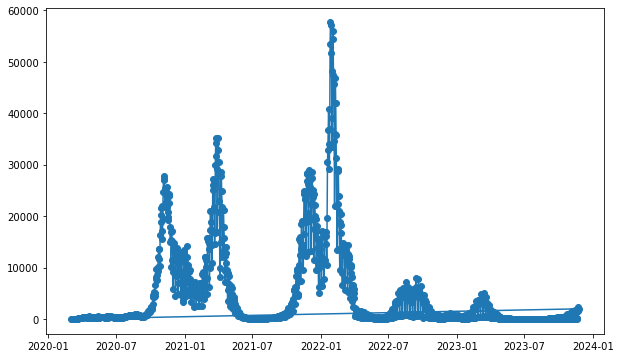

In [23]:
# Przedstawienie dziennych liczba_przypadkow według czasu

df_razem = pd.DataFrame(df_razem)
df_razem.set_index('Data', inplace=True)  #ustawienie daty jako indeks do df_razem
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_razem.index, df_razem['liczba_przypadkow'], marker='o')


In [24]:
#dane w podziale na miesiace

In [25]:
dane_zagregowane['mies_i_rok'] = df_razem['mies_i_rok'].apply(lambda x: datetime.strptime(x, "%Y-%m"))

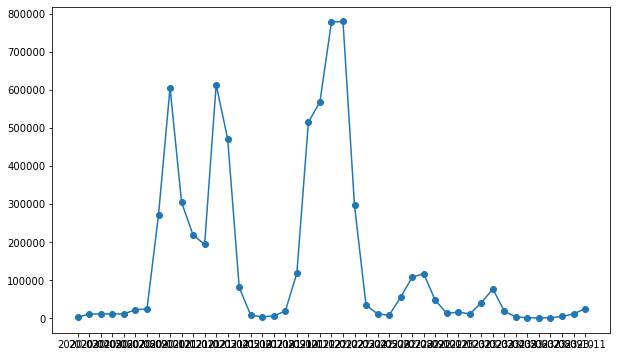

In [26]:
# Przedstawienie miesięcznych liczba_przypadkow według czasu
dane_zagregowane = pd.DataFrame(dane_zagregowane)
df_razem.set_index('mies_i_rok', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(dane_zagregowane.index, dane_zagregowane['liczba_przypadkow'], marker='o')

In [27]:
# Logarytmowanie zmiennej liczba_przypadkow 
#logarytmujemy aby zobaczyc czy ujednolici nam to wariancje
dane_zagregowane['log_l_przypadkow'] = np.log(dane_zagregowane['liczba_przypadkow'])

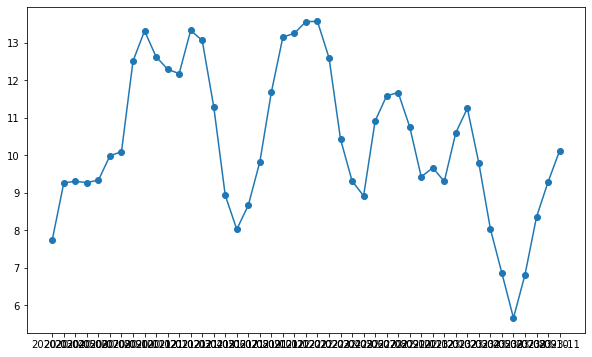

In [28]:
# Przedstawienie miesięcznych log_l_przypadkow według czasu
plt.figure(figsize=(10, 6))
plt.plot(dane_zagregowane.index, dane_zagregowane['log_l_przypadkow'], marker='o')

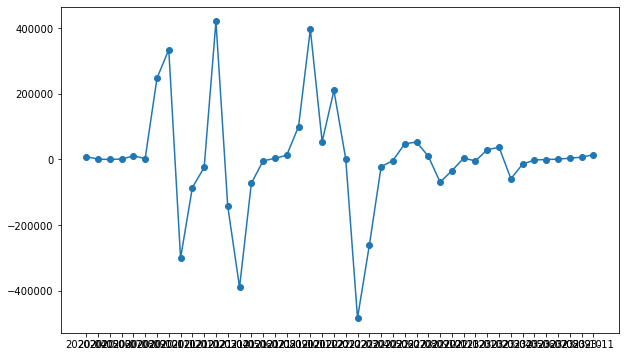

In [29]:
#widzimy, że teraz dane bardziej oscylują wokół jakiejś średniej
#sprawdzimy dane dla pierwszych roznic dla liczba_przypadkow

dane_zagregowane_diff = dane_zagregowane.diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(dane_zagregowane_diff.index, dane_zagregowane_diff['liczba_przypadkow'], marker='o')

In [30]:
#tym bardziej widzimy wartość średnią oraz odchylenia od tej wartości
#testowanie to jest w celu oceny wizualnej stacjonarności szeregu czasowego
#po ocenie wizualnej podejrzewamy że pierwsze różnice mogą być stacjonarne natomiast nie wiemy jak z logarytmem zmiennej

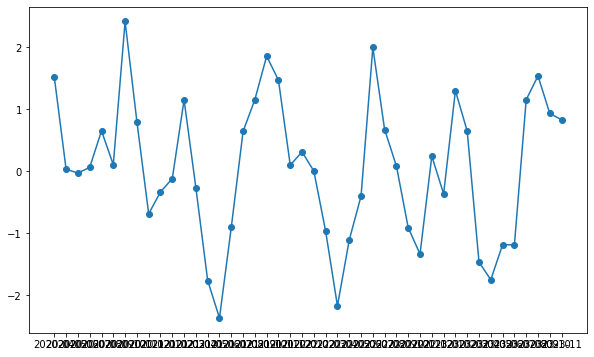

In [31]:
# różnice dla log_l_przypadkow
plt.figure(figsize=(10, 6))
plt.plot(dane_zagregowane_diff.index, dane_zagregowane_diff['log_l_przypadkow'], marker='o')

In [32]:
msk = (dane_zagregowane.index < '2023-10')  #wybór dwóch ostatnich miesięcy do zbioru testowego
#dzielimy zbior na treningowy i walidacyjny, jako walidacyjny chcemy wykorzystac ostatnie 2 miesiace jako ze metoda ARIMA
#ktorej chcemy uzyc jest najlepsza w przypadku prognozowania krotkookresowego

In [33]:
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False])

In [34]:
# Podzielenie zbioru na testowy i uczący
df_train = dane_zagregowane[msk].copy()
df_test = dane_zagregowane[~msk].copy()

In [35]:
df_train

,liczba_przypadkow,mies_i_rok,log_l_przypadkow
mies_i_rok,,,
2020-03,2311.0,NaT,7.745436
2020-04,10566.0,NaT,9.265397
2020-05,10909.0,NaT,9.297343
2020-06,10607.0,NaT,9.269269
2020-07,11295.0,NaT,9.332115
2020-08,21684.0,NaT,9.984330
2020-09,24142.0,NaT,10.091708
2020-10,271217.0,NaT,12.510675
2020-11,605438.0,NaT,13.313707


In [36]:
#test na stacjonarnosc

In [37]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_train['log_l_przypadkow'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.647659
p-value: 0.004913


In [38]:
#test ADF mowi ze przy poziomie istotnosci 0.05, odrzucamy h0 o niestacjonarnosci d=0

In [39]:
import pandas as pd
from statsmodels.tsa.stattools import kpss
wyniki_testu = kpss(df_train['log_l_przypadkow'])
print("Statystyka testu KPSS:", wyniki_testu[0])
print("Wartość p-wartości:", wyniki_testu[1])

Statystyka testu KPSS: 0.249714505913124
Wartość p-wartości: 0.1


C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [40]:
#Brak podstaw do odrzucenia hipotezy zerowej. Szereg czasowy może być stacjonarny.

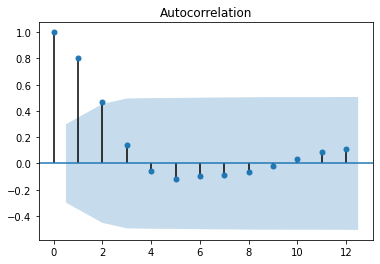

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train['log_l_przypadkow'], lags=12)

In [42]:
# widoczne istotne statystycznie sa 2 opoznienia: nie uwidacznia sie tutaj rowniez sezonowosc. Przeslanki do uzycia modelu AR(2)

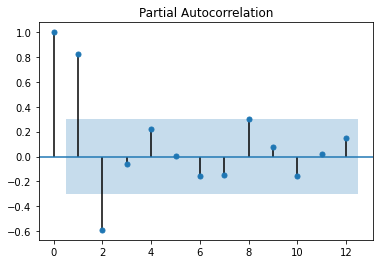

In [43]:
pacf_original = plot_pacf(df_train['log_l_przypadkow'], lags=12)

In [44]:
# w tym przypadku sa przeslanki aby uzyc MA(2)

In [45]:
#Decydujemy sie sprawdzic modele z max p=2 i max q=2

Budowa modelu ARIMA

In [46]:
#Model ARIMA to model szeregów czasowych, AR odpowiada za czesc autoregresji natomiast MA za czesc moving average
#I oznacza integration- zintegrowanie zmiennej tzn. przy obliczaniu ilu roznic zmienna bedzie stacjonarna

In [47]:
from statsmodels.tsa.arima.model import ARIMA

def wybor_modelu_ARIMA(maxp, maxd, maxq, zmienna):
    """
    Dokonuje wyboru modelu ARIMA na podstawie wartości AIC i BIC dla różnych parametrów.

    Parametry:
    maxp (int): Maksymalna wartość parametru AR(p).
    maxd (int): Maksymalna wartość parametru różnicowania.
    maxq (int): Maksymalna wartość parametru MA(q).
    zmienna (str): Nazwa zmiennej/kolumny z ramki danych.

    Zwraca:
    pandas.DataFrame: DataFrame zawierający parametry modelu, wartości AIC, BIC, p, d i q.
    """
    output=pd.DataFrame(columns=['parametry', 'wartoscAIC', 'wartoscBIC', 'p', 'd', 'q'])
    for p in range(maxp+1):
        for q in range(maxq+1):
            for d in range(maxd+1):
                model = ARIMA(df_train[zmienna], order=(p, d, q))
                model_fit = model.fit()
                nazwa_parametru= 'ARIMA('+str(p)+','+str(d)+','+str(q)+')'
                nowy_wiersz = {'parametry': nazwa_parametru, 'wartoscAIC': model_fit.aic, 'wartoscBIC': model_fit.bic, 'p': p, 'd':d, 'q':q}
                output = output.append(nowy_wiersz, ignore_index=True)
    
    return output


In [48]:
#tworzymy funkcje ktora szacuje nam tyle modeli ile parametrow podamy i oceniamy je wzgledem kryteriow AIC i BIC

In [49]:
podsumowanie=wybor_modelu_ARIMA(2,1,2, 'log_l_przypadkow')

C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

In [50]:
print(podsumowanie)

       parametry  wartoscAIC  wartoscBIC  p  d  q
0   ARIMA(0,0,0)  186.421681  189.944081  0  0  0
1   ARIMA(0,1,0)  133.615082  135.352752  0  1  0
2   ARIMA(0,0,1)  147.433365  152.716965  0  0  1
3   ARIMA(0,1,1)  123.403112  126.878451  0  1  1
4   ARIMA(0,0,2)  132.746199  139.790999  0  0  2
5   ARIMA(0,1,2)  123.535014  128.748023  0  1  2
6   ARIMA(1,0,0)  138.362978  143.646578  1  0  0
7   ARIMA(1,1,0)  125.022911  128.498250  1  1  0
8   ARIMA(1,0,1)  126.311407  133.356207  1  0  1
9   ARIMA(1,1,1)  124.494329  129.707338  1  1  1
10  ARIMA(1,0,2)  124.380157  133.186158  1  0  2
11  ARIMA(1,1,2)  124.691089  131.641767  1  1  2
12  ARIMA(2,0,0)  120.848892  127.893692  2  0  0
13  ARIMA(2,1,0)  121.506734  126.719742  2  1  0
14  ARIMA(2,0,1)  122.647562  131.453562  2  0  1
15  ARIMA(2,1,1)  119.487752  126.438431  2  1  1
16  ARIMA(2,0,2)  123.363518  133.930718  2  0  2
17  ARIMA(2,1,2)  121.141752  129.830100  2  1  2


In [51]:
# Model z minimalnym AIC to ARIMA(2,1,1)
podsumowanie[podsumowanie['wartoscAIC']==min(podsumowanie['wartoscAIC'])]

,parametry,wartoscAIC,wartoscBIC,p,d,q
15,"ARIMA(2,1,1)",119.487752,126.438431,2,1,1


In [52]:
# Model z min BIC to ARIMA(2,1,1)
podsumowanie[podsumowanie['wartoscBIC']==min(podsumowanie['wartoscBIC'])]

,parametry,wartoscAIC,wartoscBIC,p,d,q
15,"ARIMA(2,1,1)",119.487752,126.438431,2,1,1


In [53]:
#mimo, ze niestancjonarnosc nie wyszla w tescie DF, to model 2,1,1 jest najlepszy, spojrzmy jeszcze dla d=0

In [54]:
podsumowanie[podsumowanie['d']==0][podsumowanie[podsumowanie['d']==0]['wartoscAIC']==min(podsumowanie[podsumowanie['d']==0]['wartoscAIC'])]
# model ARIMA(2,0,0) z min AIC

,parametry,wartoscAIC,wartoscBIC,p,d,q
12,"ARIMA(2,0,0)",120.848892,127.893692,2,0,0


In [55]:
podsumowanie[podsumowanie['d']==0][podsumowanie[podsumowanie['d']==0]['wartoscBIC']==min(podsumowanie[podsumowanie['d']==0]['wartoscBIC'])]
# Model ARIMA(2,0,0) z min BIC

,parametry,wartoscAIC,wartoscBIC,p,d,q
12,"ARIMA(2,0,0)",120.848892,127.893692,2,0,0


In [56]:
#obejrzymy te dwa modele dokladniej

In [57]:
model1 = ARIMA(df_train['log_l_przypadkow'], order=(2, 1, 1))
model1_fit = model1.fit()
print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       log_l_przypadkow   No. Observations:                   43
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -55.744
Date:                Thu, 30 Nov 2023   AIC                            119.488
Time:                        23:06:16   BIC                            126.438
Sample:                    03-01-2020   HQIC                           122.035
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2201      0.221      5.533      0.000       0.788       1.652
ar.L2         -0.6289      0.148     -4.243      0.000      -0.919      -0.338
ma.L1         -0.7186      0.234     -3.077      0.0

C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [58]:
#wszystkie parametry sa istotne

In [59]:
model2 = ARIMA(df_train['log_l_przypadkow'], order=(2, 0, 0))
model2_fit = model2.fit()
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       log_l_przypadkow   No. Observations:                   43
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -56.424
Date:                Thu, 30 Nov 2023   AIC                            120.849
Time:                        23:06:16   BIC                            127.894
Sample:                    03-01-2020   HQIC                           123.447
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3865      0.521     19.944      0.000       9.366      11.407
ar.L1          1.3631      0.166      8.226      0.000       1.038       1.688
ar.L2         -0.6367      0.167     -3.812      0.0

C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [60]:
#tutaj rowniez wszystkie parametry sa istotne

In [61]:
#sprawdzmy jeszcze modele dla oryginalnej niezlogarytmowanej zmiennej 

In [62]:
adf_test = adfuller(df_train['liczba_przypadkow'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])


wyniki_testu = kpss(df_train['liczba_przypadkow'])
print("Statystyka testu KPSS:", wyniki_testu[0])
print("Wartość p-wartości:", wyniki_testu[1])

ADF Statistic: -3.425889
p-value: 0.010107
Statystyka testu KPSS: 0.20107559950797455
Wartość p-wartości: 0.1


C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


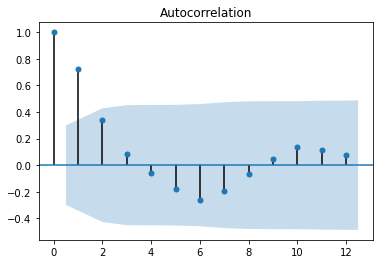

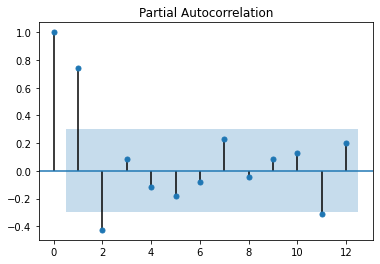

In [63]:
acf_original = plot_acf(df_train['liczba_przypadkow'], lags=12)
pacf_original = plot_pacf(df_train['liczba_przypadkow'], lags=12)


In [64]:
#Porównanie wszystkich modeli ARIMA z ustawionymi parametrami
podsumowanie2=wybor_modelu_ARIMA(2,1,1, 'liczba_przypadkow')
podsumowanie2

C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

,parametry,wartoscAIC,wartoscBIC,p,d,q
0,"ARIMA(0,0,0)",1305.741402,1309.263802,0,0,0
1,"ARIMA(0,1,0)",1130.955230,1132.692899,0,1,0
2,"ARIMA(0,0,1)",1159.287640,1164.571240,0,0,1
3,"ARIMA(0,1,1)",1130.154676,1133.630015,0,1,1
4,"ARIMA(1,0,0)",1155.811684,1161.095285,1,0,0
5,"ARIMA(1,1,0)",1131.199782,1134.675121,1,1,0
6,"ARIMA(1,0,1)",1151.445471,1158.490272,1,0,1
7,"ARIMA(1,1,1)",1131.749821,1136.962830,1,1,1
8,"ARIMA(2,0,0)",1151.042934,1158.087734,2,0,0
9,"ARIMA(2,1,0)",1129.516472,1134.729480,2,1,0


In [65]:
print(podsumowanie2[podsumowanie2['wartoscAIC']==min(podsumowanie2['wartoscAIC'])])
print(podsumowanie2[podsumowanie2['wartoscBIC']==min(podsumowanie2['wartoscBIC'])])
print(podsumowanie2[podsumowanie2['d']==0][podsumowanie2[podsumowanie2['d']==0]['wartoscAIC']==min(podsumowanie2[podsumowanie2['d']==0]['wartoscAIC'])])
print(podsumowanie2[podsumowanie2['d']==0][podsumowanie2[podsumowanie2['d']==0]['wartoscBIC']==min(podsumowanie2[podsumowanie2['d']==0]['wartoscBIC'])])

       parametry   wartoscAIC   wartoscBIC  p  d  q
11  ARIMA(2,1,1)  1128.125819  1135.076498  2  1  1
      parametry  wartoscAIC   wartoscBIC  p  d  q
1  ARIMA(0,1,0)  1130.95523  1132.692899  0  1  0
      parametry   wartoscAIC   wartoscBIC  p  d  q
8  ARIMA(2,0,0)  1151.042934  1158.087734  2  0  0
      parametry   wartoscAIC   wartoscBIC  p  d  q
8  ARIMA(2,0,0)  1151.042934  1158.087734  2  0  0


In [66]:
# Model ARIMA(2,0,0) jest najlepszy sposrod wygenerowanych modeli oryginalnej zmiennej
model3 = ARIMA(df_train['liczba_przypadkow'], order=(2, 0, 0))
model3_fit = model3.fit()
print(model3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      liczba_przypadkow   No. Observations:                   43
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -571.521
Date:                Thu, 30 Nov 2023   AIC                           1151.043
Time:                        23:06:17   BIC                           1158.088
Sample:                    03-01-2020   HQIC                          1153.641
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.511e+05   7.61e+04      1.985      0.047    1917.232       3e+05
ar.L1          0.9993      0.169      5.902      0.000       0.667       1.331
ar.L2         -0.3768      0.168     -2.243      0.0

C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [67]:
#mamy trzech kandydatow na model:
#ARIMA(2,1,1) na zlogarytmowanej zmiennej
#ARIMA(2,0,0) na zlogarytmowanej zmiennej
#ARIMA(2,0,0) na oryginalnej zmiennej 

In [68]:
#Musimy zatem ocenic je na niezaleznym zbiorze testowym

In [69]:
forecast = model1_fit.get_forecast(steps=2)

In [70]:
#Prognozy na następny miesiąc (pamietajac o tym ze wynikiem jest logarytm)
import math
test_forecast = model1_fit.get_forecast(steps=len(df_test))
test_forecast_series = pd.Series([math.exp(test_forecast.predicted_mean[0]), math.exp(test_forecast.predicted_mean[1])], index=df_test.index)
print(test_forecast_series)

mies_i_rok
2023-10    12485.325360
2023-11    17728.898143
dtype: float64


In [71]:
#obliczamy MSE i RMSE
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(df_test['liczba_przypadkow'], test_forecast_series)
rmse1 = mse1**0.5

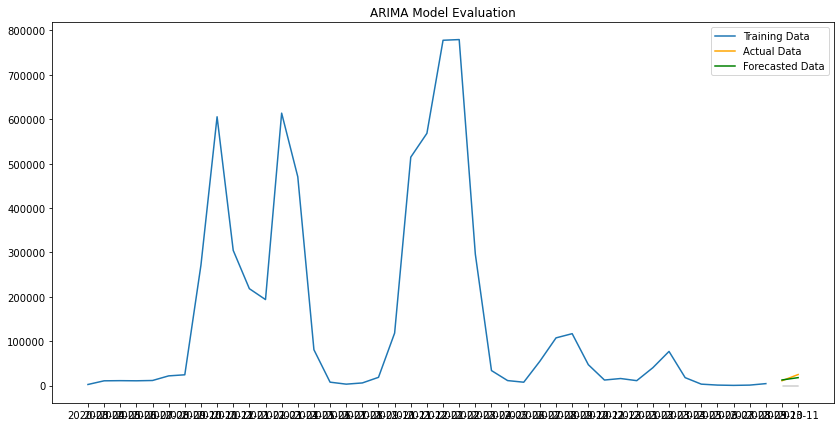

In [72]:
# Prognozy z model1
plt.figure(figsize=(14,7))
plt.plot(df_train['liczba_przypadkow'], label='Training Data')
plt.plot(df_test['liczba_przypadkow'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(df_test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.legend()
plt.show()

#Prognozy trochę niższe od aktualnych, ale bardzo bliskie

mies_i_rok
2023-10    19701.280460
2023-11    60083.409614
dtype: float64


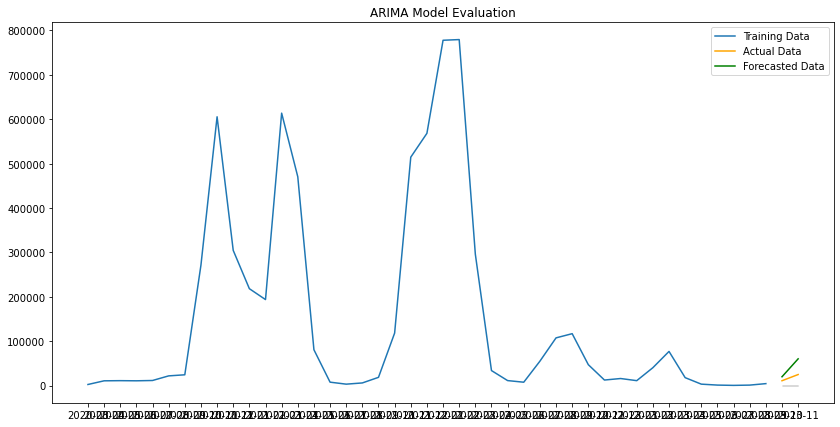

In [73]:
#Prognozy model2
test_forecast = model2_fit.get_forecast(steps=len(df_test))
test_forecast_series = pd.Series([math.exp(test_forecast.predicted_mean[0]), math.exp(test_forecast.predicted_mean[1])], index=df_test.index)
print(test_forecast_series)
mse2 = mean_squared_error(df_test['liczba_przypadkow'], test_forecast_series)
rmse2 = mse2**0.5
plt.figure(figsize=(14,7))
plt.plot(df_train['liczba_przypadkow'], label='Training Data')
plt.plot(df_test['liczba_przypadkow'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(df_test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.legend()
plt.show()
# Przeszacowuje prognozy

mies_i_rok
2023-10     60939.733144
2023-11    116351.977265
dtype: float64


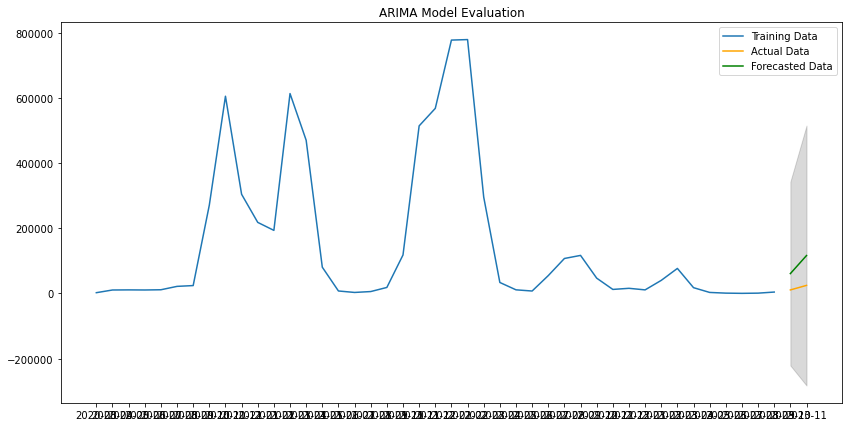

In [74]:
# #Prognozy model3
test_forecast = model3_fit.get_forecast(steps=len(df_test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=df_test.index)
print(test_forecast_series)
mse3 = mean_squared_error(df_test['liczba_przypadkow'], test_forecast_series)
rmse3 = mse3**0.5
plt.figure(figsize=(14,7))
plt.plot(df_train['liczba_przypadkow'], label='Training Data')
plt.plot(df_test['liczba_przypadkow'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(df_test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
#plt.xlabel('Date')
#plt.ylabel('Number of Births')
plt.legend()
plt.show()

# Przeszacowuje prognozy

In [75]:
bledy_prognozy = pd.DataFrame({'Model': [1, 2, 3], 'mse': [mse1, mse2, mse3], 'rmse': [rmse1, rmse2, rmse3]})

In [76]:
print(bledy_prognozy)

   Model           mse          rmse
0      1  2.594548e+07   5093.671040
1      2  6.650725e+08  25788.999174
2      3  5.456595e+09  73868.768989


In [77]:
bledy_prognozy[bledy_prognozy['mse']==min(bledy_prognozy['mse'])]

,Model,mse,rmse
0,1,2.594548e+07,5093.67104


In [78]:
bledy_prognozy[bledy_prognozy['rmse']==min(bledy_prognozy['rmse'])]

,Model,mse,rmse
0,1,2.594548e+07,5093.67104


In [79]:
#model pierwszy okazal sie najlepszy w prognozie, pozostale modele powoduja overestymacje

In [80]:
#nalezy ponownie wyestymowac model1 na wszystkich danych, aby zaprognozowac nieznany miesiac

In [81]:
model_final = ARIMA(dane_zagregowane['log_l_przypadkow'], order=(2, 1, 1))
model_final_fit = model_final.fit()
print(model_final_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       log_l_przypadkow   No. Observations:                   45
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -57.544
Date:                Thu, 30 Nov 2023   AIC                            123.089
Time:                        23:06:18   BIC                            130.225
Sample:                    03-01-2020   HQIC                           125.735
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2503      0.199      6.275      0.000       0.860       1.641
ar.L2         -0.6311      0.145     -4.343      0.000      -0.916      -0.346
ma.L1         -0.7619      0.196     -3.896      0.0

C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\veron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [82]:
test_forecast = model_final_fit.get_forecast(steps=1)
round(math.exp(test_forecast.predicted_mean[0]),0)

26765.0

In [83]:
aa = pd.DataFrame({'liczba_przypadkow': [round(math.exp(test_forecast.predicted_mean[0]),0)], 'mies_i_rok':['2023-12']})


In [84]:
aa.set_index('mies_i_rok', inplace=True)
aa
#Prognoza na grudzień wynosi 26765.0

,liczba_przypadkow
mies_i_rok,
2023-12,26765.0


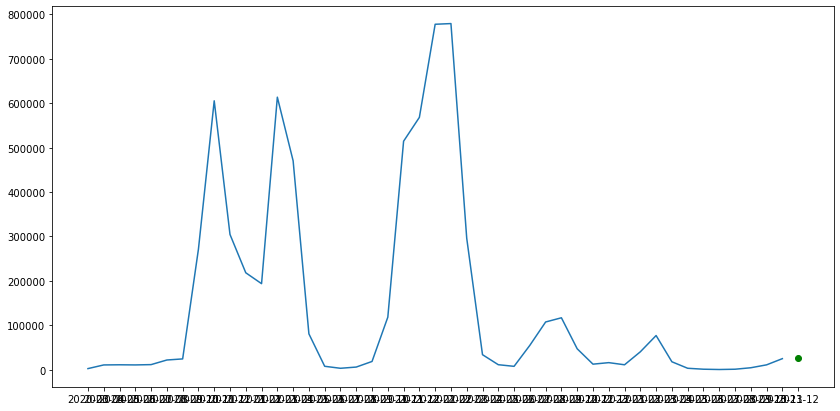

In [85]:
# Pokazanie prognozy na grudzień na wykresie
plt.figure(figsize=(14,7))
plt.plot(dane_zagregowane['liczba_przypadkow'], label='Training Data')
plt.plot(aa['liczba_przypadkow'], marker='o', label='Forecasted Data', color='green')
